In [17]:
import sqlite3
import pandas as pd
con = sqlite3.connect("database.sqlite", timeout=10)
c = con.cursor()

In [18]:
c.execute("SELECT name FROM sqlite_master WHERE type='table';")
tabs = pd.DataFrame(c.fetchall())
tabs.columns = [x[0] for x in c.description]
tabs

,name
0,sqlite_sequence
1,Matches
2,Teams_in_Matches
3,Teams
4,Unique_Teams
5,Teams2011


The "Teams2011" Table is the Table that was added below.  Let's look at each of the other Tables.

In [151]:
c.execute("SELECT * FROM sqlite_sequence")
seq = pd.DataFrame(c.fetchall())
seq.columns = [x[0] for x in c.description]
seq.head()

,name,seq
0,Matches,46774
1,Unique_Teams,128


In [152]:
c.execute("SELECT * FROM Matches LIMIT 10")
mat = pd.DataFrame(c.fetchall())
mat.columns = [x[0] for x in c.description]
mat

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H
1,2,D2,2009,2009-11-01,Munich 1860,Kaiserslautern,0,1,A
2,3,D2,2009,2009-10-04,Frankfurt FSV,Kaiserslautern,1,1,D
3,4,D2,2009,2010-02-21,Frankfurt FSV,Karlsruhe,2,1,H
4,5,D2,2009,2009-12-06,Ahlen,Karlsruhe,1,3,A
5,6,D2,2009,2010-04-03,Union Berlin,Karlsruhe,1,1,D
6,7,D2,2009,2009-08-14,Paderborn,Karlsruhe,2,0,H
7,8,D2,2009,2010-03-08,Bielefeld,Karlsruhe,0,1,A
8,9,D2,2009,2009-09-26,Kaiserslautern,Karlsruhe,2,0,H
9,10,D2,2009,2009-11-21,Hansa Rostock,Karlsruhe,2,1,H


In [153]:
c.execute("SELECT * FROM Teams_in_Matches LIMIT 10")
tim = pd.DataFrame(c.fetchall())
tim.columns = [x[0] for x in c.description]
tim

,Match_ID,Unique_Team_ID
0,1,26
1,1,46
2,2,26
3,2,42
4,3,26
5,3,44
6,4,29
7,4,44
8,5,29
9,5,49


In [154]:
c.execute("SELECT * FROM Teams LIMIT 10")
teams = pd.DataFrame(c.fetchall())
teams.columns = [x[0] for x in c.description]
teams

,Season,TeamName,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity
0,2017,Bayern Munich,27,26,15,597950000,22150000,75000
1,2017,Dortmund,33,25,18,416730000,12630000,81359
2,2017,Leverkusen,31,24,15,222600000,7180000,30210
3,2017,RB Leipzig,30,23,15,180130000,6000000,42959
4,2017,Schalke 04,29,24,17,179550000,6190000,62271
5,2017,M'gladbach,31,25,17,154400000,4980000,54014
6,2017,Wolfsburg,31,24,14,124430000,4010000,30000
7,2017,FC Koln,24,26,9,118550000,4940000,49968
8,2017,Hoffenheim,31,24,14,107330000,3460000,30164
9,2017,Hertha,26,26,12,86800000,3340000,74475


In [155]:
c.execute("SELECT * FROM Unique_Teams LIMIT 10")
uteams = pd.DataFrame(c.fetchall())
uteams.columns = [x[0] for x in c.description]
uteams

,TeamName,Unique_Team_ID
0,Bayern Munich,1
1,Dortmund,2
2,Leverkusen,3
3,RB Leipzig,4
4,Schalke 04,5
5,M'gladbach,6
6,Wolfsburg,7
7,FC Koln,8
8,Hoffenheim,9
9,Hertha,10


In [157]:
c.execute("CREATE TABLE IF NOT EXISTS Teams2011 (team_name text, goals_scored_2011 int, wins_2011 int, visualization blob, rainy_wins_percentage float)")

In [158]:
c.execute("SELECT * FROM Teams2011 LIMIT 10")
team11 = pd.DataFrame(c.fetchall())
team11

""


In [159]:
c.execute("SELECT COUNT(*) FROM Unique_Teams")
print(c.fetchall())

[(128,)]


In [160]:
c.execute("SELECT COUNT(*) FROM Matches")
print(c.fetchall())

[(24625,)]


Interesting.  The number of unique teams is correctly indicated in the above table, but the number of matches isn't.  We'll proceed as if it were.

In [163]:
c.execute("SELECT COUNT(*) FROM Matches WHERE Season=2011")
print(c.fetchall())

[(992,)]


In [30]:
c.execute("SELECT COUNT(DISTINCT(HomeTeam)) FROM Matches WHERE Season=2011")
print(c.fetchall())

[(56,)]


In [32]:
c.execute("SELECT COUNT(DISTINCT(AwayTeam)) FROM Matches WHERE Season=2011")
print(c.fetchall())

[(56,)]


In [187]:
c.execute("SELECT DISTINCT(HomeTeam) FROM Matches WHERE Season=2011 ORDER BY HomeTeam")
allteams = pd.DataFrame(c.fetchall())
allteams.columns = [x[0] for x in c.description]
print(len(allteams))
allteams.head()

56


,HomeTeam
0,Aachen
1,Arsenal
2,Aston Villa
3,Augsburg
4,Bayern Munich


All our team team tables from now on (involving just 2011 Season) should have 56 teams. Otherwise data will be missing.

In [188]:
c.execute("SELECT HomeTeam, SUM(FTHG) AS HomeGoals FROM Matches WHERE Season=2011 GROUP BY HomeTeam ORDER BY HomeTeam")
home_goals = pd.DataFrame(c.fetchall())
home_goals.columns = [x[0] for x in c.description]
print(len(home_goals))
home_goals.head()

56


,HomeTeam,HomeGoals
0,Aachen,15
1,Arsenal,39
2,Aston Villa,20
3,Augsburg,20
4,Bayern Munich,49


In [189]:
c.execute("SELECT AwayTeam, SUM(FTAG) AS AwayGoals FROM Matches WHERE Season=2011 GROUP BY AwayTeam ORDER BY AwayTeam")
away_goals = pd.DataFrame(c.fetchall())
away_goals.columns = [x[0] for x in c.description]
print(len(away_goals))
away_goals.head()

56


,AwayTeam,AwayGoals
0,Aachen,15
1,Arsenal,35
2,Aston Villa,17
3,Augsburg,16
4,Bayern Munich,28


In [190]:
c.execute("DROP TABLE IF EXISTS Home")
c.execute("CREATE TABLE Home AS SELECT HomeTeam, SUM(FTHG) AS HomeGoals FROM Matches WHERE Season=2011 GROUP BY HomeTeam ORDER BY HomeTeam")
c.execute("DROP TABLE IF EXISTS Away")
c.execute("CREATE TABLE Away AS SELECT AwayTeam, SUM(FTAG) AS AwayGoals FROM Matches WHERE Season=2011 GROUP BY AwayTeam ORDER BY AwayTeam")
c.execute("SELECT Home.HomeTeam AS Team, Home.HomeGoals, Away.AwayGoals, Home.HomeGoals + Away.AwayGoals AS BothGoals FROM HOME INNER JOIN Away ON Home.HomeTeam=Away.AwayTeam")
HomeAway = pd.DataFrame(c.fetchall())
HomeAway.columns = [x[0] for x in c.description]
print(len(away_goals))
HomeAway.head()

56


,Team,HomeGoals,AwayGoals,BothGoals
0,Aachen,15,15,30
1,Arsenal,39,35,74
2,Aston Villa,20,17,37
3,Augsburg,20,16,36
4,Bayern Munich,49,28,77


In [191]:
c.execute("SELECT HomeTeam, COUNT(HomeTeam) AS HomeWins FROM Matches WHERE FTR='H' AND Season=2011 GROUP BY HomeTeam")
HomeWins = pd.DataFrame(c.fetchall())
HomeWins.columns = [x[0] for x in c.description]
print(len(HomeWins))
HomeWins.head()

56


,HomeTeam,HomeWins
0,Aachen,4
1,Arsenal,12
2,Aston Villa,4
3,Augsburg,6
4,Bayern Munich,14


In [192]:
c.execute("SELECT HomeTeam, COUNT(HomeTeam) AS HomeNonWins FROM Matches WHERE (FTR='A' OR FTR='D') AND Season=2011 GROUP BY HomeTeam")
HomeNonWins = pd.DataFrame(c.fetchall())
HomeNonWins.columns = [x[0] for x in c.description]
print(len(HomeNonWins))
HomeNonWins.head()

56


,HomeTeam,HomeNonWins
0,Aachen,13
1,Arsenal,7
2,Aston Villa,15
3,Augsburg,11
4,Bayern Munich,3


In [193]:
c.execute("SELECT HomeTeam, COUNT(HomeTeam) AS HomeGames FROM Matches WHERE Season=2011 GROUP BY HomeTeam")
AllHome = pd.DataFrame(c.fetchall())
AllHome.columns = [x[0] for x in c.description]
print(len(AllHome))
AllHome.head()


56


,HomeTeam,HomeGames
0,Aachen,17
1,Arsenal,19
2,Aston Villa,19
3,Augsburg,17
4,Bayern Munich,17


In [194]:
c.execute("SELECT HomeTeam, COUNT(HomeTeam) AS HomeLosses FROM Matches WHERE FTR='A' AND Season=2011 GROUP BY HomeTeam")
HomeLosses = pd.DataFrame(c.fetchall())
HomeLosses.columns = [x[0] for x in c.description]
print(len(HomeLosses))
HomeLosses.head()

54


,HomeTeam,HomeLosses
0,Aachen,7
1,Arsenal,3
2,Aston Villa,8
3,Augsburg,4
4,Bayern Munich,2


Interseting: len=54.  Apparently two teams had no Home Losses.  Way to go teams!

In [195]:
c.execute("SELECT AwayTeam, COUNT(AwayTeam) AS AwayWins FROM Matches WHERE FTR='A' AND Season=2011 GROUP BY AwayTeam")
AwayWins = pd.DataFrame(c.fetchall())
AwayWins.columns = [x[0] for x in c.description]
print(len(AwayWins))
AwayWins.head()

56


,AwayTeam,AwayWins
0,Aachen,2
1,Arsenal,9
2,Aston Villa,3
3,Augsburg,2
4,Bayern Munich,9


In [196]:
c.execute("SELECT AwayTeam, COUNT(AwayTeam) AS AwayNonWins FROM Matches WHERE (FTR='H' OR FTR='D') AND Season=2011 GROUP BY AwayTeam")
AwayNonWins = pd.DataFrame(c.fetchall())
AwayNonWins.columns = [x[0] for x in c.description]
print(len(AwayNonWins))
AwayNonWins.head()

56


,AwayTeam,AwayNonWins
0,Aachen,15
1,Arsenal,10
2,Aston Villa,16
3,Augsburg,15
4,Bayern Munich,8


In [197]:
c.execute("SELECT AwayTeam, COUNT(AwayTeam) AS AwayGames FROM Matches WHERE Season=2011 GROUP BY AwayTeam")
AllAway = pd.DataFrame(c.fetchall())
AllAway.columns = [x[0] for x in c.description]
print(len(AllAway))
AllAway.head()


56


,AwayTeam,AwayGames
0,Aachen,17
1,Arsenal,19
2,Aston Villa,19
3,Augsburg,17
4,Bayern Munich,17


In [198]:
c.execute("SELECT AwayTeam, COUNT(AwayTeam) AS AwayLosses FROM Matches WHERE FTR='H' AND Season=2011 GROUP BY AwayTeam")
AwayLosses = pd.DataFrame(c.fetchall())
AwayLosses.columns = [x[0] for x in c.description]
print(len(AwayLosses))
AwayLosses.head()

56


,AwayTeam,AwayLosses
0,Aachen,8
1,Arsenal,7
2,Aston Villa,6
3,Augsburg,8
4,Bayern Munich,5


In [199]:
HomeWins.set_index('HomeTeam', inplace=True)
HomeLosses.set_index('HomeTeam', inplace=True)
HomeNonWins.set_index('HomeTeam', inplace=True)
AwayWins.set_index('AwayTeam', inplace=True)
AwayLosses.set_index('AwayTeam', inplace=True)
AwayNonWins.set_index('AwayTeam', inplace=True)
pass

In [201]:
WinsLosses = HomeWins.join(AwayWins, how='left').join(HomeLosses, how='left').join(AwayLosses, how='left').join(HomeNonWins, how='left').join(AwayNonWins, how='left')
print(len(WinsLosses))
WinsLosses

56


,HomeWins,AwayWins,HomeLosses,AwayLosses,HomeNonWins,AwayNonWins
HomeTeam,,,,,,
Aachen,4,2,7.0,8,13,15
Arsenal,12,9,3.0,7,7,10
Aston Villa,4,3,8.0,6,15,16
Augsburg,6,2,4.0,8,11,15
Bayern Munich,14,9,2.0,5,3,8
Blackburn,6,2,12.0,11,13,17
Bochum,7,3,7.0,10,10,14
Bolton,4,6,11.0,11,15,13
Braunschweig,6,4,3.0,6,11,13


**Man City** and **Hanover** had no home losses and were assigned NaNs.  The others in that column are floats.  Let's fix these problems.

In [202]:
WinLoss = WinsLosses.fillna(0).astype(int)

In [204]:
print(len(WinLoss))
WinLoss.head()

56


,HomeWins,AwayWins,HomeLosses,AwayLosses,HomeNonWins,AwayNonWins
HomeTeam,,,,,,
Aachen,4,2,7,8,13,15
Arsenal,12,9,3,7,7,10
Aston Villa,4,3,8,6,15,16
Augsburg,6,2,4,8,11,15
Bayern Munich,14,9,2,5,3,8


In [128]:
WinLoss['TotalWins'] = WinLoss.HomeWins + WinLoss.AwayWins

In [130]:
WinLoss['TotalLosses'] = WinLoss.HomeLosses + WinLoss.AwayLosses

In [206]:
WinLoss['TotalDraws'] = (WinLoss.HomeNonWins - WinLoss.HomeLosses) + (WinLoss.AwayNonWins - WinLoss.AwayLosses)

In [207]:
print(len(WinLoss))
WinLoss.head()

56


,HomeWins,AwayWins,HomeLosses,AwayLosses,HomeNonWins,AwayNonWins,TotalDraws
HomeTeam,,,,,,,
Aachen,4,2,7,8,13,15,13
Arsenal,12,9,3,7,7,10,7
Aston Villa,4,3,8,6,15,16,17
Augsburg,6,2,4,8,11,15,14
Bayern Munich,14,9,2,5,3,8,4


In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

The instructions asked for a histogram, but they really wanted a bar plot.  Here is a histogram.

Text(0, 0.5, 'Count of Teams with Result')

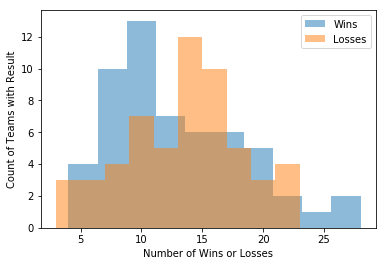

In [150]:
plt.hist(WinLoss.TotalWins, alpha=.5, label='Wins')
plt.hist(WinLoss.TotalLosses, alpha=.5, label='Losses')
plt.legend()
plt.xlabel("Number of Wins or Losses")
plt.ylabel("Count of Teams with Result")

Now let's do a bar plot for each team.  We'll start with an example for Arsenal.